<a href="https://colab.research.google.com/github/White2e/BPLAPractise2/blob/main/Scikit_learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Импортируем необходимые библиотеки

In [1]:
import pandas as pd
import numpy as np

<h3><strong><font color="#809BFF">Задача №1</font></strong></h3>


Решим задачу бинарной классификации! В датасете `ionosphere` представлена информация о космических структурах, полученная с радара, и данные о нахождении этого объекта в ионосфере. Наша задача: по данным с радара предсказать находится объект в ионосфере или нет.

Загрузим датасет `ionosphere.csv`. Последний столбец - это классы, остальные признаки. Необходимо обработать входные данные и получить массивы типа `float32`, размера:
* `X_train (235, 34)` *(2/3 от всей выборки)*
* `X_test (116, 34) ` *(1/3 от всей выборки)*
* `y_train (235,)` *(2/3 от всей выборки)*
* `y_test (116,)` *(1/3 от всей выборки)* <br>
Учтите, что классы отмечены символами, и к ним необходимо применить функцию `LabelEncoder`.

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [4]:
# место для кода
df1 = pd.read_csv('ionosphere.csv', header=None)
df1.head(5)

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V26,V27,V28,V29,V30,V31,V32,V33,V34,Class
1,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1,0.0376,...,-0.51171,0.41078,-0.46168,0.21266,-0.3409,0.42267,-0.54487,0.18641,-0.453,1
2,1,0,1,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.1904,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,0
3,1,0,1,-0.03365,1,0.00485,1,-0.12062,0.88965,0.01198,...,-0.4022,0.58984,-0.22145,0.431,-0.17365,0.60436,-0.2418,0.56045,-0.38238,1
4,1,0,1,-0.45161,1,1,0.71216,-1,0,0,...,0.90695,0.51613,1,1,-0.20099,0.25682,1,-0.32382,1,0


In [5]:
# [1, 2, 3, 4] -> [1:-1] -> [2, 3]

# [
#     [1, 2],
#     [3, 4]
# ]

# -> [:, :-1] ->

# [
#     [1],
#     [3]
# ]

In [7]:
# место для кода
X1 = df1.values[1:, :-1]
y1 = df1.values[1:, -1]

y1 = LabelEncoder().fit_transform(y1)

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X1, y1, test_size=0.33)

n_features_1 = X_train_1.shape[1]

X_train_1 = np.asarray(X_train_1).astype(np.float32)
y_train_1 = np.asarray(y_train_1).astype(np.float32)

X_test_1 = np.asarray(X_test_1).astype(np.float32)
y_test_1 = np.asarray(y_test_1).astype(np.float32)

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

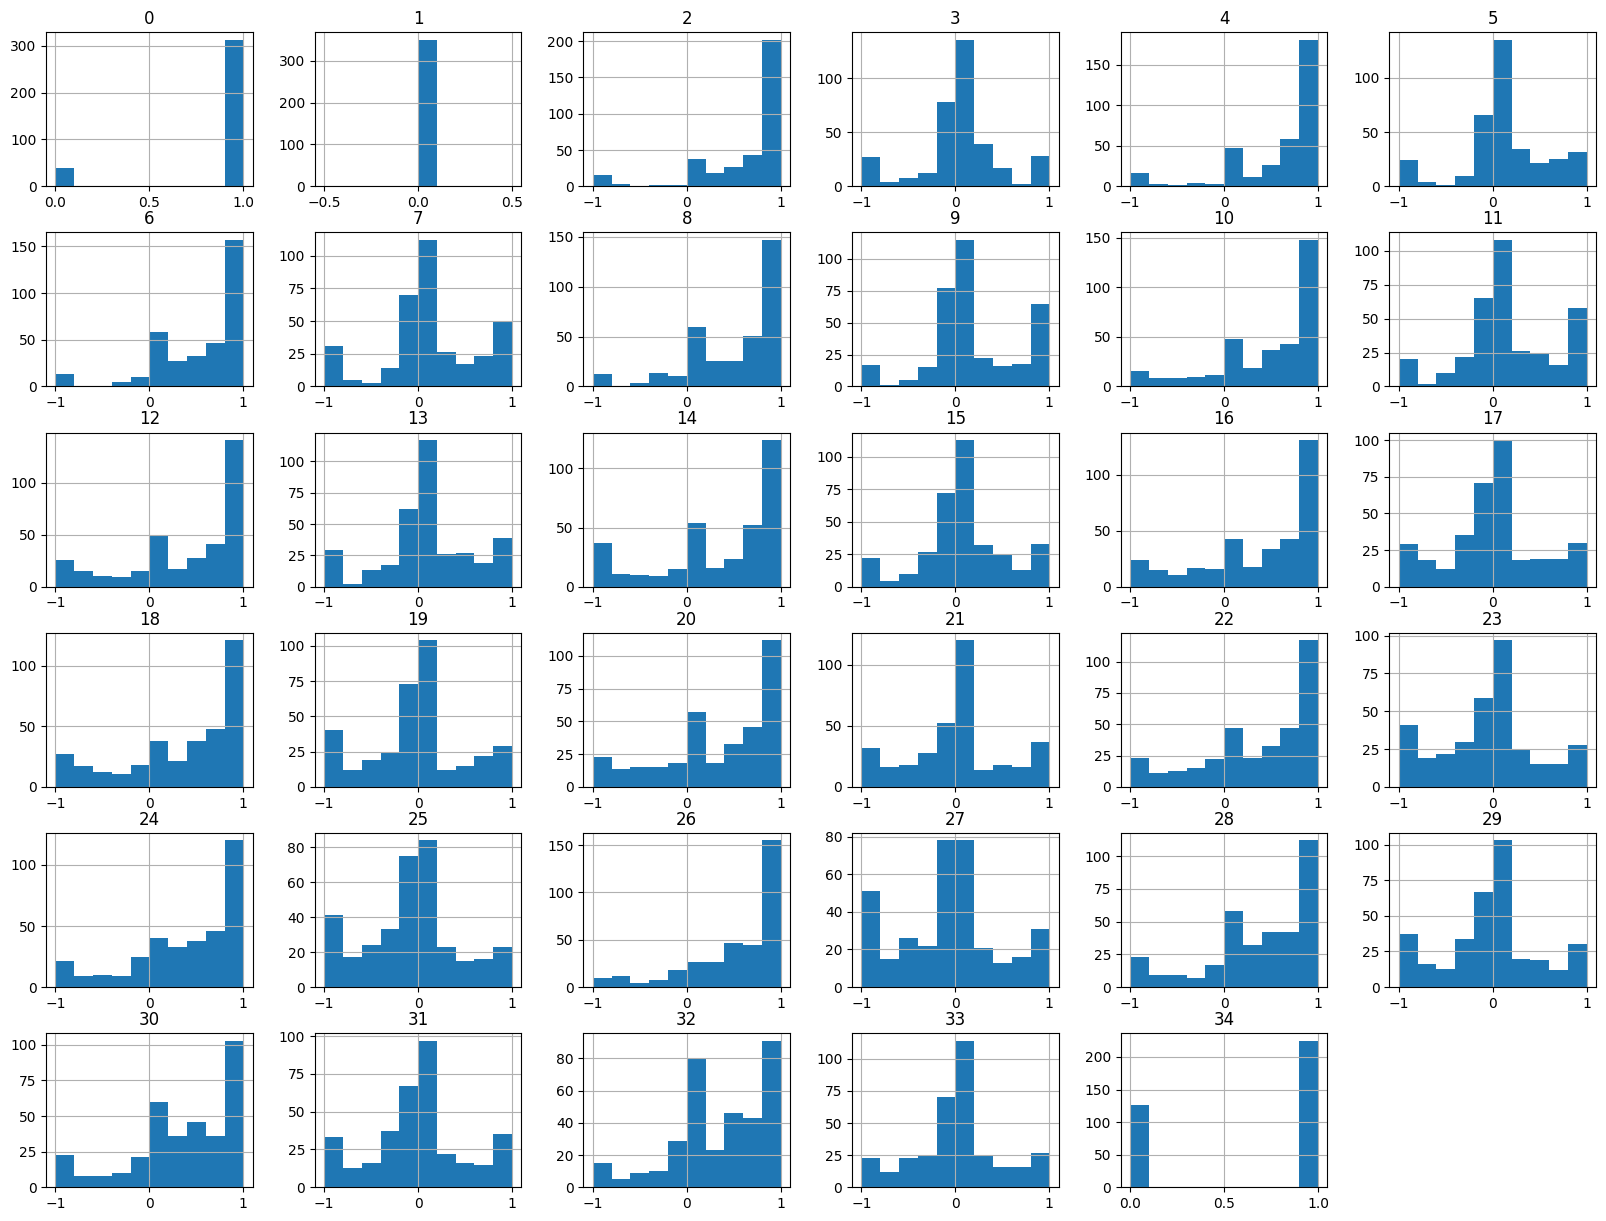

In [12]:
df1 = df1.apply(pd.to_numeric, errors="coerce")
df1.hist(figsize=(20,15))
plt.show()

<h3><strong><font color="#809BFF">Задача №2</font></strong></h3>

Теперь составим модель используя полносвязные слои `Dense`, обучим её на `train` выборке и проверим качество на `test`.

In [13]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [14]:
model = Sequential()
model.add(Dense(20, activation='relu', input_shape=(n_features_1, )))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# место для кода
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train_1, y_train_1, epochs=100, batch_size=32)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6369 - loss: 0.6800
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7025 - loss: 0.6322  
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6854 - loss: 0.6306 
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7065 - loss: 0.6105 
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7355 - loss: 0.5973 
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7433 - loss: 0.5700 
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7529 - loss: 0.5609 
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7735 - loss: 0.5402 
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7827 - loss: 0.5374 
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8014 - loss: 0.5093 
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8478 - loss: 0.4806 
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8448 - los

In [15]:
# место для кода
loss, acc = model.evaluate(X_test_1, y_test_1)
print('Test Accuracy: %.3f' % acc, ', Test Loss: %.3f' % loss)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9048 - loss: 0.3779  
Test Accuracy: 0.905 , Test Loss: 0.396


<h3><strong><font color="#809BFF">Задача №3</font></strong></h3>

Отлично, а теперь попробуем решить задачу регрессии, использую `Keras`. У нас имеется датасет, в котором последний столбец является ценой недвижимости в 1000$, а остальные описывают объект недвижимости (криминальный рейтинг района, количество комнат и т.д.)

Наша задача заключается в том, чтобы по имеющимся признакам предсказать цену на объект. Как и в предыдущей задаче нам необходимо подготовить данные и разделить их на `train` и `test` выборки в отношение  **2/1**.

In [ ]:
# место для кода
df2 = pd.read_csv('housing.csv', header=None)
df2.head(5)

In [ ]:
from sklearn.preprocessing import StandardScaler

# место для кода
X2 = df2.values[:, :-1]
y2 = df2.values[:, -1]

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X2, y2, test_size=0.33)

n_features_2 = X_train_2.shape[1]

<h3><strong><font color="#809BFF">Задача №4</font></strong></h3>

Составим и обучим регрессионную модель! И проверим качество на тестовой выборке.

In [ ]:
model = Sequential()
model.add(Dense(50, activation='relu', input_shape=(n_features_2, )))
model.add(Dense(40, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))

# место для кода
model.compile(optimizer='adam',
              loss='mse')
model.fit(X_train_2, y_train_2,
          epochs=200, batch_size=32)

In [ ]:
# место для кода
error = model.evaluate(X_test_2, y_test_2)
print('MSE: %.3f' % error, 'RMSE: %.3f' % np.sqrt(error))

6/6 [==============================] - 0s 2ms/step - loss: 21.2353
MSE: 21.235 RMSE: 4.608


In [ ]:
pred = model.predict(X_test_2)
for i in range(10):
  print(f"Предсказание: {pred[i]}, реальная цена: {y_test_2[i]}")

<h3><strong><font color="#809BFF">Задача №5</font></strong></h3>

Отлично! Однако мы помним, что для нейросетей важно, чтобы они были обучены необходимое количество итераций, то есть не переобучались и не недообучались. Рассмотрим методы борьбы с переобучением!

Инициализируем нейросеть с полносвязными слоями для искусственно сгенерированной выборки. Добавим в нашу модель слой `Dropout`. Его суть заключается в том, чтобы на разных эпохах случайно выбрасывать часть нейронов из обучения. В таком случае, оставшиеся получает более адаптивные веса, как следствие меньшая склонность к переобучению и большая обобщающая способность.

In [ ]:
from tensorflow.keras.layers import Dropout
from sklearn.datasets import make_classification

In [ ]:
# место для кода
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)


In [ ]:
# место для кода
n_features_3 = X.shape[1]

model = Sequential()
model.add(Dense(10, activation='relu', input_shape=(n_features_3,)))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X, y, epochs=100, batch_size=32, verbose=1)

In [ ]:
loss, acc = model.evaluate(X, y)
print('Test Accuracy: %.3f' % acc, ', Test Loss: %.3f' % loss)

32/32 [==============================] - 0s 2ms/step - loss: 0.2879 - accuracy: 0.8820
Test Accuracy: 0.882 , Test Loss: 0.288


<h3><strong><font color="#809BFF">Задача №6</font></strong></h3>

А теперь в ту же сеть добавим слой `BatchNormalization`. <br>
Разберемся как он работает! Когда мы подаем на вход данные нейросети, мы нормируем их, укладывая в промежуток `[0, 1]`. Но на выходе после очередного слоя мы может получить большое значение, не входящее в промежуток `[0, 1]`. Как раз эту проблему и решает слой `BatchNormalization`, он нормирует значения нейросети между слоями.

Добавим этот слой в предыдущую нейросеть.

In [ ]:
from tensorflow.keras.layers import BatchNormalization

In [ ]:
# место для кода
model = Sequential()
model.add(Dense(10, activation='relu',input_shape=(n_features_1,)))
model.add(Dense(10, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1, activation='sigmoid'))

In [ ]:
# место для кода
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train_1, y_train_1, epochs=100, batch_size=32, verbose=0)

In [ ]:
loss, acc = model.evaluate(X_test_1, y_test_1)
print('Test Accuracy: %.3f' % acc, ', Test Loss: %.3f' % loss)

4/4 [==============================] - 0s 4ms/step - loss: 0.2595 - accuracy: 0.9138
Test Accuracy: 0.914 , Test Loss: 0.259


<h3><strong><font color="#809BFF">Задача №7</font></strong></h3>

Рассмотрим следующую полезную функцию фреймворка `keras`, без которой сложно представить глубокое обучение, - это ранняя остановка. <br>
Ее суть заключается в том, чтобы нейросеть сама контролировала процесс переобучения, и когда он наступает, прекращала обучение. Процесс обучения контролируется на валидационной выборке, то есть на части данных, на которых обучение не происходит, чтобы избежать переобучение.

Добавим в предыдущую модель эту функцию.

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from sklearn.model_selection import train_test_split

In [ ]:
# место для кода
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)
n_features = X.shape[1]

In [ ]:
# место для кода
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X, y, test_size=0.2)

model = Sequential()
model.add(Dense(10, activation='relu', input_shape=(n_features,)))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
es = EarlyStopping(monitor='val_loss', patience=2)
model.fit(X_train_1, y_train_1, epochs=100, batch_size=32, callbacks=[es])

<h3><strong><font color="#809BFF">Задача №8</font></strong></h3>

А теперь агрегируем все полученные знания на этом уроке и решим первую задачу с датасетом `ionosphere`, используя новые слои. И посмотрим  на то, как изменилось качество.

In [ ]:
# место для кода
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)
n_features = X.shape[1]

In [ ]:
# место для кода
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X, y, test_size=0.2)

model = Sequential()
model.add(Dense(20, activation='relu', input_shape=(n_features,)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(30, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(20, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

In [ ]:
# место для кода
es = EarlyStopping(monitor='val_loss', patience=5)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train_1, y_train_1, epochs=1000, batch_size=32, callbacks=[es], validation_split=0.3)

In [ ]:
# место для кода
loss, acc = model.evaluate(X_test_1, y_test_1)
print(f"Потери: {loss}, точность: {acc}")

7/7 [==============================] - 0s 2ms/step - loss: 0.2829 - accuracy: 0.8750
Потери: 0.2829298675060272, точность: 0.875
